In [1]:
## Enviroment Setup
import os, sys
WORKING_DIR = '/home/peizhi/Documents/flame-head-tracker'
os.chdir(WORKING_DIR) # change the working directory to the project's absolute path
print("Current Working Directory: ", os.getcwd())

## Computing Device
device = 'cuda:0'
import torch
torch.cuda.set_device(device) # this will solve the problem that OpenGL not on the same device with torch tensors

import matplotlib.pyplot as plt
import numpy as np

from tracker_base import Tracker

def plot(ret_dict, i=0):
    # plot some results
    plt.figure(figsize=(15,6))
    plt.subplot(1,5,1); plt.imshow(ret_dict['img'][i]); plt.title('img'); plt.axis('off')
    plt.subplot(1,5,2); plt.imshow(ret_dict['parsing'][i]); plt.title('parsing'); plt.axis('off')
    plt.subplot(1,5,3); plt.imshow(ret_dict['img_rendered'][i]); plt.title('img_rendered'); plt.axis('off')
    plt.subplot(1,5,4); plt.imshow(ret_dict['shape_rendered'][i]); plt.title('shape_rendered'); plt.axis('off')
    if 'mesh_rendered' in ret_dict:
        plt.subplot(1,5,5); plt.imshow(ret_dict['mesh_rendered'][i]); plt.title('mesh_rendered'); plt.axis('off')
    plt.show()


###########################
## Setup Flame Tracker    #     
###########################

tracker_cfg = {
    'mediapipe_face_landmarker_v2_path': './models/face_landmarker.task',
    'flame_model_path': './models/FLAME2020/generic_model.pkl',
    'flame_lmk_embedding_path': './models/landmark_embedding.npy',
    'ear_landmarker_path': './models/ear_landmarker.pth', # this is optional, if you do not want to use ear landmarks during fitting, just remove this line
    'tex_space_path': './models/FLAME_albedo_from_BFM.npz',
    'face_parsing_model_path': './models/79999_iter.pth',
    'template_mesh_file_path': './models/head_template.obj',
    'result_img_size': 512,
    'use_matting': True,           # use image/video matting to remove background
    'optimize_fov': True,          # whether to optimize the camera FOV, NOTE: this feature is still experimental
    'device': device,
}

tracker = Tracker(tracker_cfg)

# optional settings
tracker.update_init_fov(fov=20)    # this is the initial camera FOV, default is 20
tracker.set_landmark_detector('mediapipe')


Current Working Directory:  /home/peizhi/Documents/flame-head-tracker
Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


I0000 00:00:1754168875.171081 1296571 task_runner.cc:85] GPU suport is not available: INTERNAL: ; RET_CHECK failure (mediapipe/gpu/gl_context_egl.cc:84) egl_initializedUnable to initialize EGL
W0000 00:00:1754168875.171366 1296571 face_landmarker_graph.cc:174] Sets FaceBlendshapesGraph acceleration to xnnpack by default.
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1754168875.186292 1296832 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1754168875.202096 1296843 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
Using cache found in /home/peizhi/.cache/torch/hub/PeterL1n_RobustVideoMatting_master


creating the FLAME Decoder


/home/peizhi/Documents/flame-head-tracker/submodules/flame_lib/FLAME.py:85: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.register_buffer('dynamic_lmk_faces_idx', torch.tensor(lmk_embeddings['dynamic_lmk_faces_idx'], dtype=torch.long))
/home/peizhi/Documents/flame-head-tracker/submodules/flame_lib/FLAME.py:86: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.register_buffer('dynamic_lmk_bary_coords', torch.tensor(lmk_embeddings['dynamic_lmk_bary_coords'], dtype=self.dtype))
/home/peizhi/miniconda3/envs/tracker/lib/python3.10/site-packages/pytorch3d/io/obj_io.py:550: UserWarning: Mtl file does not exist: ./models/template.mtl
  warnings.warn(f"Mtl file does not exist: {f}")
/home/p

creating the FLAME Decoder
trained model found. load models/deca_model.tar


/home/peizhi/miniconda3/envs/tracker/lib/python3.10/site-packages/pytorch3d/io/obj_io.py:550: UserWarning: Mtl file does not exist: models/template.mtl
  warnings.warn(f"Mtl file does not exist: {f}")



>>> Flame Head Tracker v4.1 ready.


### Demo 1: Landmark-based Fitting



W0000 00:00:1754168883.218845 1296844 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.
/home/peizhi/miniconda3/envs/tracker/lib/python3.10/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/home/peizhi/miniconda3/envs/tracker/lib/python3.10/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


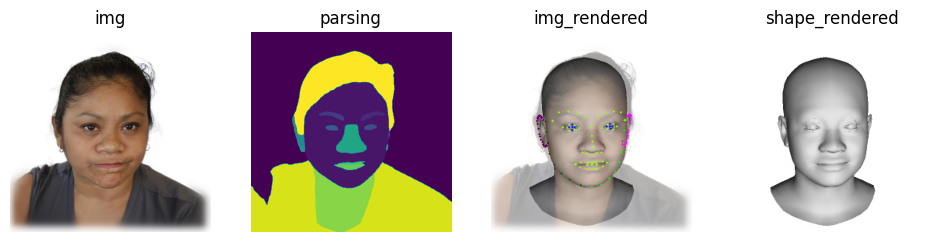

shape (1, 300)
exp (1, 100)
head_pose (1, 3)
jaw_pose (1, 3)
eye_pose (1, 6)
tex (1, 50)
light (1, 9, 3)
cam (1, 6)
FOV =  [22.490868]
K (1, 3, 3)
img_rendered (1, 256, 256, 3)
shape_rendered (1, 256, 256, 3)
img (1, 512, 512, 3)
img_aligned (1, 512, 512, 3)
parsing (1, 512, 512)
parsing_aligned (1, 512, 512)
lmks_68 (1, 68, 2)
lmks_ears (1, 20, 2)
lmks_eyes (1, 10, 2)
blendshape_scores (1, 52)


In [2]:
img_path = './assets/FFHQ/00002.png'

# if realign == True, 
# img will be replaced by the realigned image
ret_dict = tracker.load_image_and_run(img_path, realign=True, photometric_fitting=False) 
plot(ret_dict)

# check the shapes of returned results
for key in ret_dict:
    if key == 'fov': print('FOV = ', ret_dict[key])
    else: print(f'{key} {ret_dict[key].shape}')


### Demo 2: Photometric Fitting

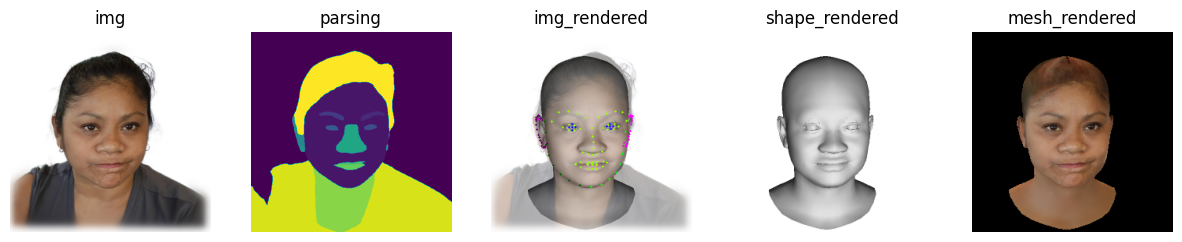

FOV =  [22.490868]


In [3]:
img_path = './assets/FFHQ/00002.png'

ret_dict = tracker.load_image_and_run(img_path, realign=True, photometric_fitting=True)
plot(ret_dict)

print('FOV = ', ret_dict['fov'])


### More Results (batch fitting)

FOV = 22.7458438873291
Camera:  [ 0.2473 -0.2339 -0.0002  0.1728  0.184   0.7119]


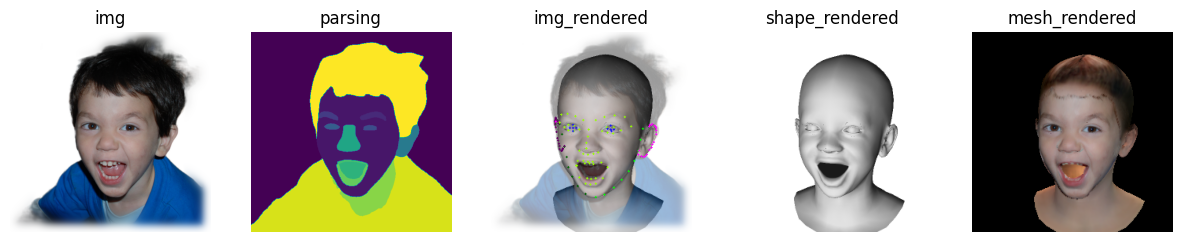

FOV = 23.514240264892578
Camera:  [-0.3112  0.1048 -0.0622 -0.2309 -0.0488  0.7376]


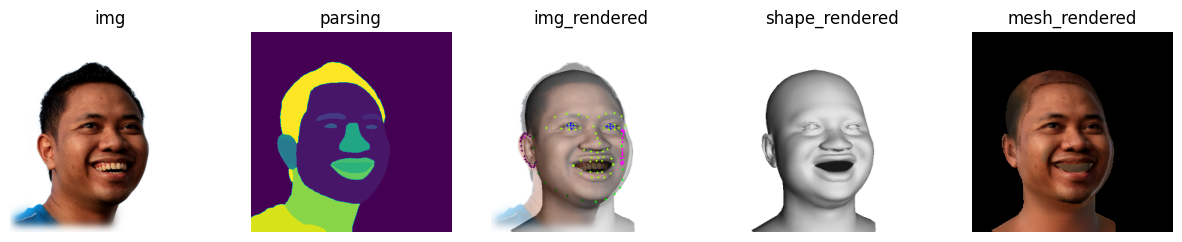

FOV = 22.018877029418945
Camera:  [ 0.0875 -0.2033 -0.018   0.0694  0.1691  0.7779]


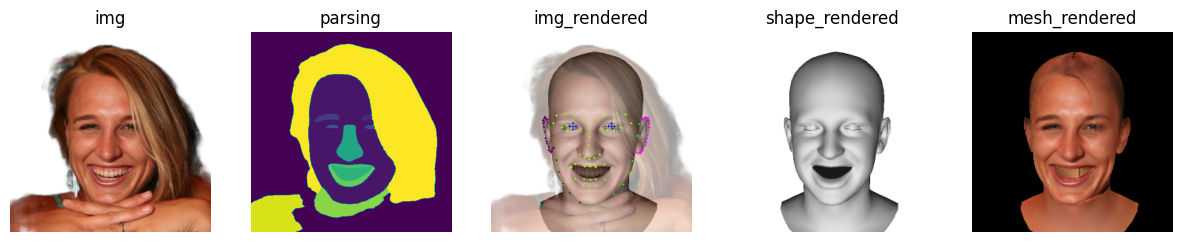

FOV = 23.059598922729492
Camera:  [-0.0288  0.0357 -0.0061 -0.0207 -0.0134  0.79  ]


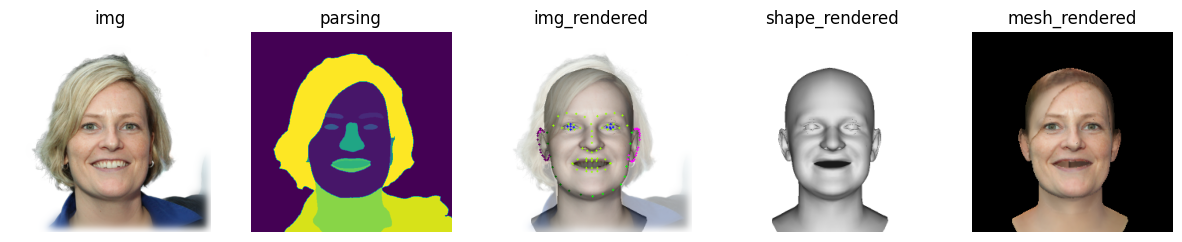

FOV = 23.242305755615234
Camera:  [0.0489 0.0097 0.0081 0.0351 0.0068 0.7231]


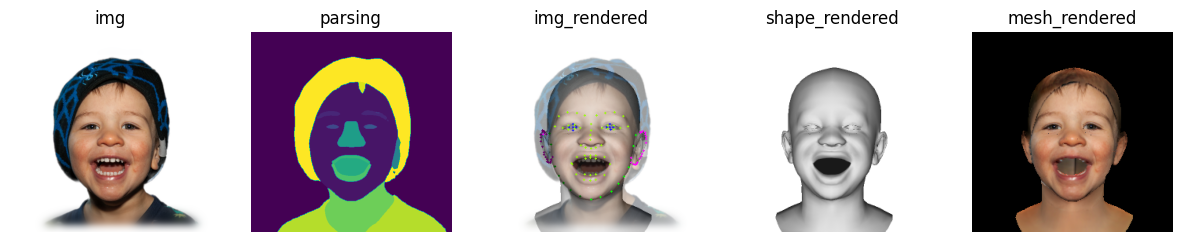

FOV = 23.42791748046875
Camera:  [-0.3109 -0.1328  0.0818 -0.2244  0.0891  0.7104]


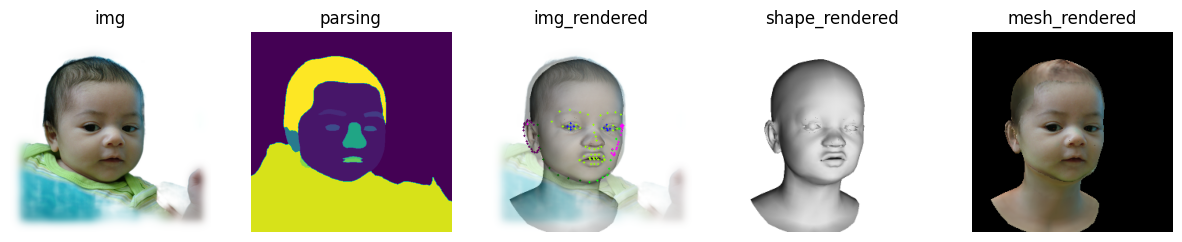

FOV = 22.305423736572266
Camera:  [ 0.0263 -0.0497 -0.0022  0.0233  0.0591  0.8924]


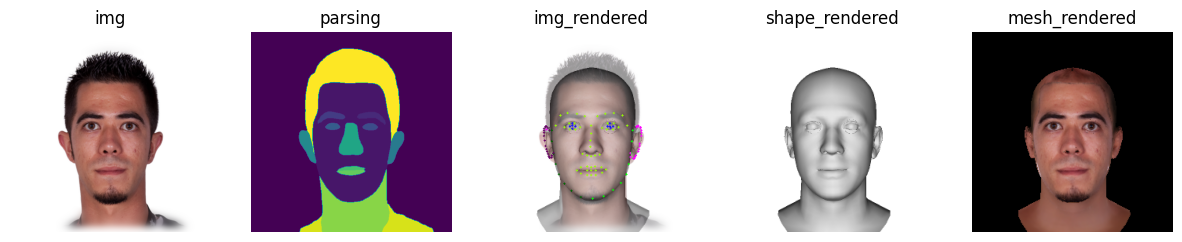

FOV = 24.720375061035156
Camera:  [-0.3812 -0.2644  0.0956 -0.2744  0.1749  0.6822]


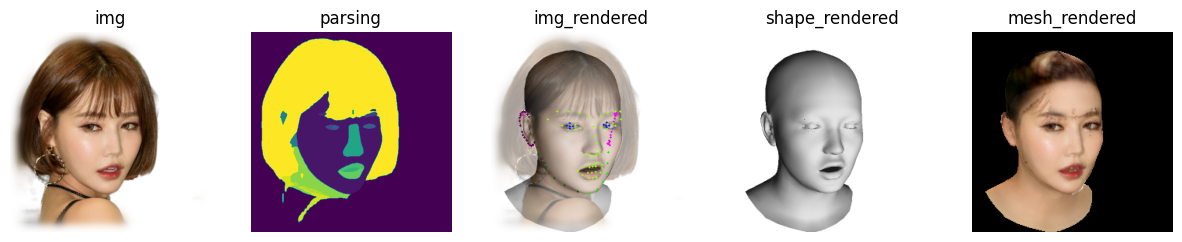

FOV = 20.89303207397461
Camera:  [ 0.0221  0.0127 -0.0023  0.02    0.0047  0.8745]


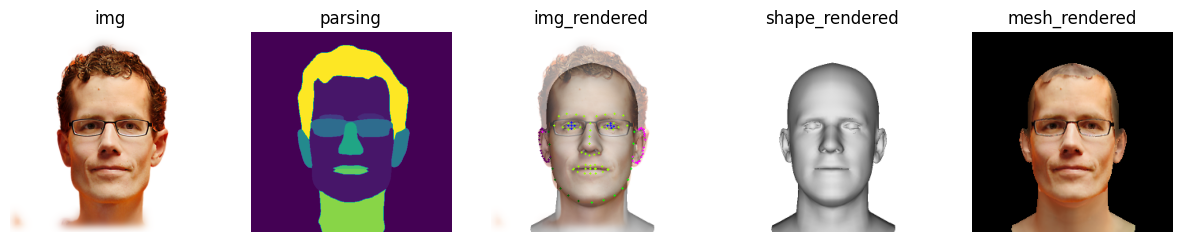

FOV = 22.433311462402344
Camera:  [-0.1217 -0.2143  0.0189 -0.1016  0.1885  0.8455]


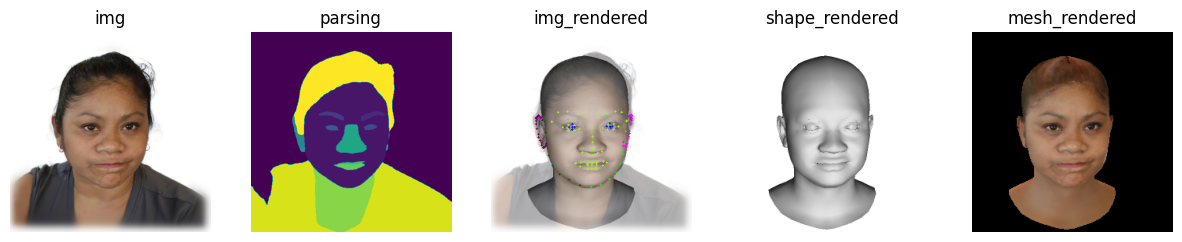

FOV = 21.880821228027344
Camera:  [ 0.0708 -0.1281  0.0036  0.0614  0.1275  0.8968]


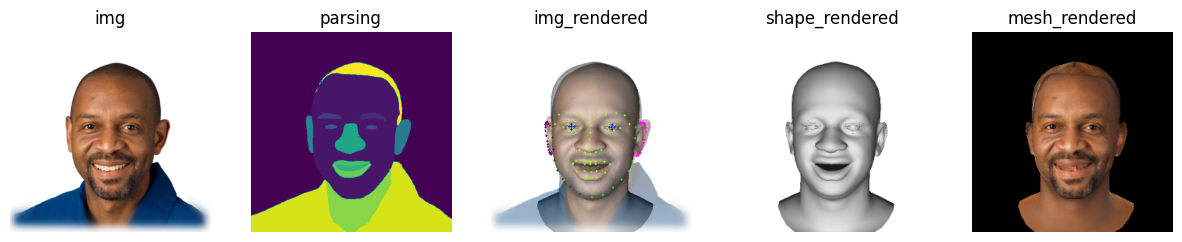

In [4]:
img_paths = [os.path.join('./assets/FFHQ/', f) for f in os.listdir('./assets/FFHQ/') if f.endswith('.png') and f.startswith('.') is False]

ret_dict, valid_indices = tracker.load_batch_images_and_run(img_paths, realign=True, photometric_fitting=True)

for i, idx in enumerate(valid_indices):
    img_path = img_paths[idx]
    print('FOV = {}'.format(ret_dict['fov'][i]))
    np.set_printoptions(suppress=True, precision=4)
    print('Camera: ', ret_dict['cam'][i])
    plot(ret_dict, i)

